<a href="https://www.kaggle.com/code/anshudhiman/knn-predicting-diabetes?scriptVersionId=126745748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# KNN- 
### Predict whether a person will have diabetes or not

# Import dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Exploratory data analysis

In [3]:
# preview the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
len(data)

768

Values of the columns like 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI' , 'Insulin' cannot be accepted as zeros becoz it will affect the outcome we can replace such values with the mean of the respective column.

In [5]:
# Replace Zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI' , 'Insulin']

for column in zero_not_accepted:
  data[column] = data[column].replace(0, np.NaN)
  mean = int(data[column].mean(skipna=True))
  data[column] = data[column].replace(np.NaN, mean)

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

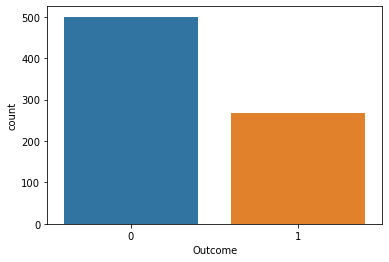

In [7]:
sns.countplot(x = 'Outcome', data = data)

In [8]:
count_diabetes = data["Outcome"].value_counts()
count_diabetes

0    500
1    268
Name: Outcome, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


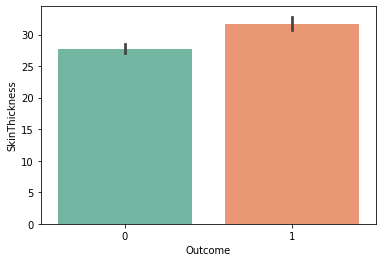

In [9]:
res = sns.barplot(data["Outcome"], data["SkinThickness"], palette = "Set2")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


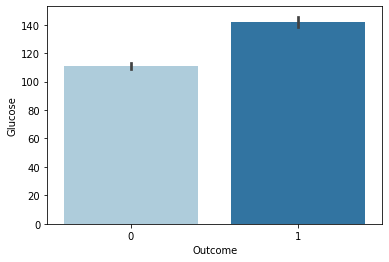

In [10]:
res = sns.barplot(data["Outcome"], data["Glucose"], palette = "Paired")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


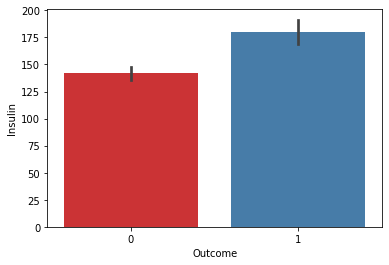

In [11]:
res = sns.barplot(data["Outcome"], data["Insulin"], palette = "Set1")
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

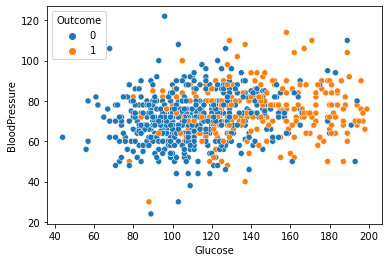

In [12]:
sns.scatterplot(x = "Glucose", y = "BloodPressure", data = data, hue = "Outcome" )

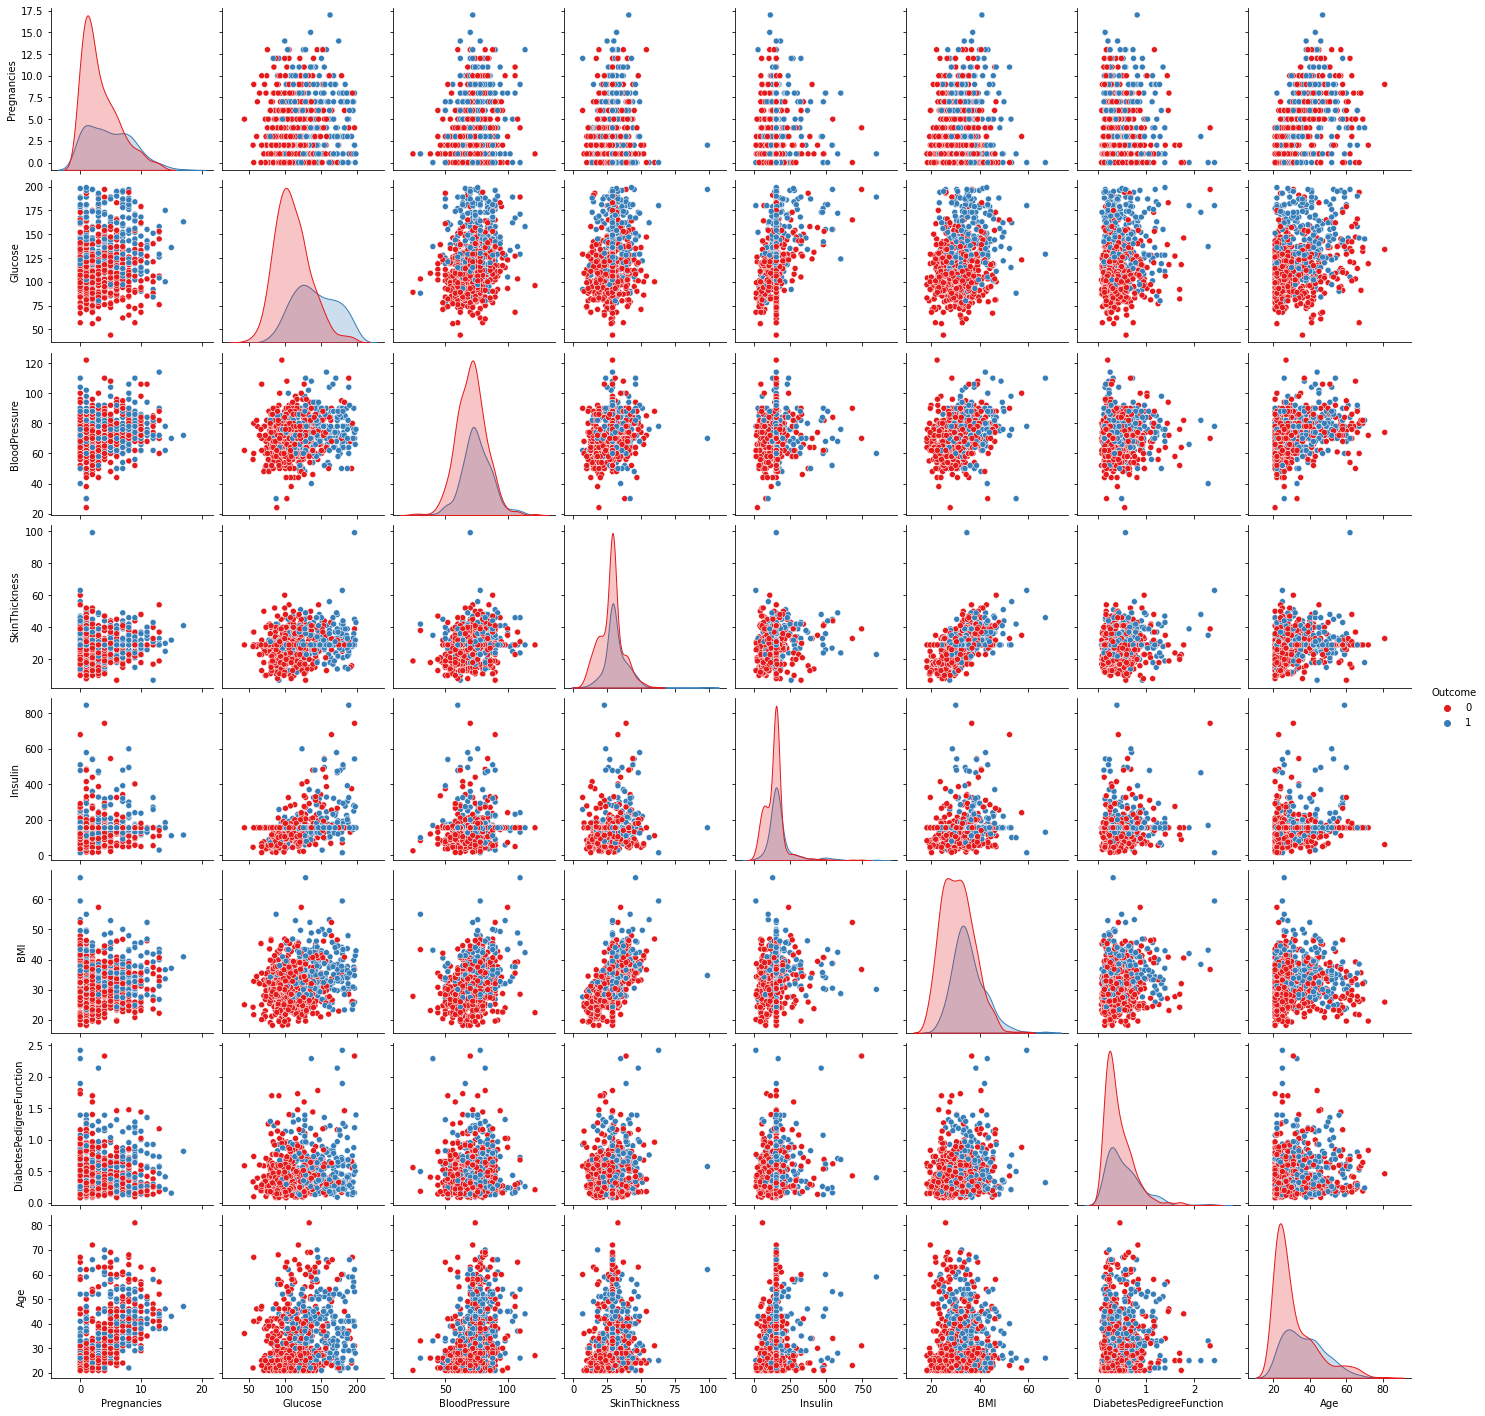

In [13]:
sns.pairplot(data ,hue = "Outcome",palette = "Set1")

# Model building 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


# Splitting Data to train and test data

In [15]:
# split dataset
X = data.iloc[:, 0:8] 
y = data.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling Down the features

In [16]:
# Feature scaling 
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
import math
math.sqrt(len(y_train))   #here we can use this no. as value of K

24.779023386727733

# Fit K Neighbours Classifier to the training set

In [18]:
# Define the model: init K-NN
classifier = KNeighborsClassifier(n_neighbors = 23, p=2, metric = 'euclidean')

In [19]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

# Predictions

In [20]:
# Predict the test set results
y_pred = classifier.predict(X_test)


# Model Evaluation

In [21]:
# Evaluate model
confusion_matrix(y_test,y_pred)

array([[93, 14],
       [19, 28]])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       107
           1       0.67      0.60      0.63        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



In [23]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [24]:
f1_score(y_test,y_pred)

0.6292134831460674

## So here we have predicted a model using KNN which can predict whether a person will have diabetes or not with an accuracy score of 81% that tells us that it is a pretty fair fit in the model

### So this Kernel comes to an end. Give your valuable feedback for improvements. Thank you:))